<h1 style='text-align:center'>Simulação de Canal de Comunicação segundo Modelo Erceg</h1>

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#%%latex

O modelo Erceg foi construído e estudado de acordo com o dado experimentais coletados pela AT&T Wireless Service em 95 estações dentro dos EUA operando a 1,9GHz. O modelo enumera três categorias de terrenos que provocam perdas no sinal e eles são divididos da seguinte maneira; a categoria A representa terrenos com morros e colinas e com alta de densidade de obejetos no caminho do sinal, o que representa uma alta perda de percurso. Categoria C representa um terreno plano com baixa densidade de objetos no caminho do sinal, representando uma baixa perda do sinal, já a categoria B é constituída por terrenos montanhososo com baixa densidade de objetos ou terrenos plano com densidade consideravel de objetos no caminho do sinal, basicamente a categoria B representa um meio termo entre as categorias A e C, com perda de sinal mediana quando compara com as outras.

Para todas as três categorias o caminho de perda mediana é representada pela mesma equação com a condição de $d > d_0$, no caso a seguinte equação.$$
\begin{equation}\label{eq:erceg}
    P_L(dB) = 20\log_{10}(4\pi d_0/\lambda)+10\gamma \log_{10}(d/d_0)+s
\end{equation}
$$Onde $\lambda$ é o comprimento de onda do sinal, s é o efeito de sombreamento do sinal, $\gamma$ representa o caminho de menor perda considerando as três categorias do modelo, representado pela seguinte equação 
$$
\gamma = a - bh_b + c/h_b
$$
$h_b$ representa a altura da estação base em metros, normalmente entre 10 e 80m, $d_0=100m$ e os valores nominais de a, b e c variam de acordo com a catgoria do terrenos, seus valores variam de acordo a seguinte tabela:

|Parametro|Categoria A|Categoria B|Categoria C|
|---------|-----------|-----------|-----------|
|a|4,6|3|3,6|
|b|0,0076|0,0065|0,005|
|c|12,6|17,1|20|





Definiçao das variáveis $d_0$, $h_b$ e $s$

In [3]:
d0 = 100
hb = 50
s = 6
f = 1900000000

Definição das distâncias a serem simuladas

In [4]:
d = np.arange(1, 1000, 1)

Construção dos arrays das categorias

In [5]:
a = np.array([4.6, 3, 3.6])
b = np.array([0.0076, 0.0065, 0.005])
c = np.array([12.6, 17.1, 20])

Array com os valores de gamma

In [6]:
gamma = [a[i]-b[i]*hb+c[i]/hb for i in range(3)]

Com os valores instânciados podemos analisar a resposta para cada uma das três situações

In [7]:
v1 = 20*np.log10(4*math.pi*d0*f/300000000)+10*gamma[0]*np.log10(d/d0)+s
v2 = 20*np.log10(4*math.pi*d0*f/300000000)+10*gamma[1]*np.log10(d/d0)+s
v3 = 20*np.log10(4*math.pi*d0*f/300000000)+10*gamma[2]*np.log10(d/d0)+s

Plotando os resultados obtidos

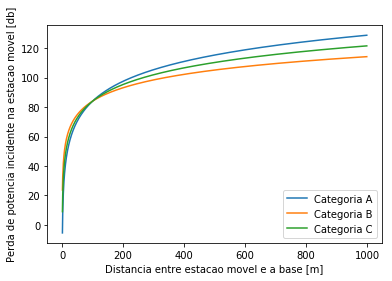

In [8]:
plt.plot(d, v1, label='Categoria A')
plt.plot(d, v2, label='Categoria B')
plt.plot(d, v3, label='Categoria C')

plt.xlabel('Distancia entre estacao movel e a base [m]')
plt.ylabel('Perda de potencia incidente na estacao movel [db]')
plt.legend()
# plt.title('Perda de Potencia em funcao da distancia entre estacao movel e base')

Analisando as curva obtidas em função da distância entre a estação rádio base e o dispositivo móvel podemos verificar para distâncias $d<d_0$ as curvas apresentam comportamento similar, apresentado perdas de potência próximas, um forte indicativo de que os fatores usados para compor o modelo Erceg entregam praticamente os mesmos valores independente da categoria do terreno por onde sinal se propaga. É interessante notar que as divergência entre as curvas para cada categoria se tornam evidentes quando $d>2d_0$, fazendo as curvas divergirem.

Um ponto interessante a se simular é fixar a distância entre a estação rádio móvel, no caso para as três situações possíveis, $d<d_0$, $d=d_0$ e $d>d_0$ e verificar o comportamento de uma frequencia variavel, alguns limites para esse caso são importantes pois o modelo Erceg foi projetado para trabalhar com frequências próximas de 2GHz, logo não faz sentido simular algo para todo o espectro, logo a simulação foi centrada em 2GHz com uma faixa de $+/-$300MHz, ou seja, foi simulado o comportamento da perda de potência para uma distância fixa para a faixa de frequência iniciando em 1,7GHz e finalizando em 2,3GHz no passo de 100KHz.

In [9]:
fval = np.arange(1700000000, 2300000000, 100000)
fv1 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[0]*np.log10(100/d0)+s
fv2 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[1]*np.log10(100/d0)+s
fv3 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[2]*np.log10(100/d0)+s

fv4 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[0]*np.log10(50/d0)+s
fv5 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[1]*np.log10(50/d0)+s
fv6 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[2]*np.log10(50/d0)+s

fv7 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[0]*np.log10(200/d0)+s
fv8 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[1]*np.log10(200/d0)+s
fv9 = 20*np.log10(4*math.pi*d0*fval/300000000)+10*gamma[2]*np.log10(200/d0)+s

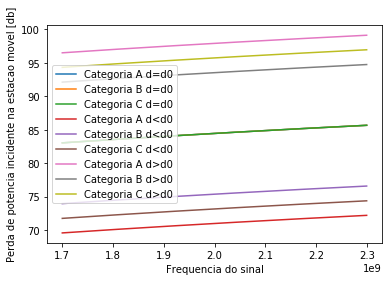

In [10]:
plt.plot(fval, fv1, label='Categoria A d=d0')
plt.plot(fval, fv2, label='Categoria B d=d0')
plt.plot(fval, fv3, label='Categoria C d=d0')

plt.plot(fval, fv4, label='Categoria A d<d0')
plt.plot(fval, fv5, label='Categoria B d<d0')
plt.plot(fval, fv6, label='Categoria C d<d0')

plt.plot(fval, fv7, label='Categoria A d>d0')
plt.plot(fval, fv8, label='Categoria B d>d0')
plt.plot(fval, fv9, label='Categoria C d>d0')

plt.xlabel('Frequencia do sinal')
plt.ylabel('Perda de potencia incidente na estacao movel [db]')
plt.legend()

Analisando as curvas geradas, chama atenção que quando $d=d_0$ as curvas são iguais, ou seja, independente da categoria a variação da frequência produz o mesmo resultado, contudo este comportamente era previsto pelo modelo pois com $d=d_0$ o termo que depende das categorias de terreno é anulado do modelo, fazendo com que ele dependesse apenas da frequência.

Para distâncias $d<d_0$ o modelo apresenta baixa perdas quando comparado com os outros casos simulados, configurando este como o caso ideal de uso. Para distâncias $d>d_0$ o modelo já apresenta perdas maiores quando colocado em comparação com as outras curvas geradas.

Outra simulacao possivel seria variar a altura da torre fixando a uma frequencia e um $d$ especifico assim seria possivel enteder qual a relacao da alura da torre

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.210.3876&rep=rep1&type=pdf
http://morse.colorado.edu/~tlen5510/text/classwebch3.html
https://www.mathworks.com/matlabcentral/fileexchange/39322-erceg-model
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

<h1 style='text-align:center'>Simulação de Propagacao em Multipercurso</h1>

$$X(t)=X_c(t)+jX_s(t)$$
$$X_c(t)=\dfrac{2}{\sqrt M}\sum_{n=1}^{M}\cos (\Psi_n)\cos (\omega_d t \cos a_n + \phi)$$
$$X_s(t)=\dfrac{2}{\sqrt M}\sum_{n=1}^{M}\sin (\Psi_n)\cos (\omega_d t \cos a_n + \phi)$$
$$a_n = \dfrac{2\pi n - \pi + \theta}{4M}$$

Onde $\theta$, $\phi$ e $\Psi_n$ sao estatisticamente independente, variando entre $[-\pi,\pi)$ para todo $n$. A simulacao do artigo foi testada com $M = 8$

A expressão pode ser manilpulada de forma a reunir todos os fatores em uma única expressão.
$$
X_k(t)= \sqrt{\dfrac{2}{M}} \left\{ \sum_{n=1}^{M}\cos (\Psi_{n,k})\cos \left[\omega_d t \cos \left(\dfrac{2\pi n - \pi + \theta}{4M}\right) + \phi_k \right] \right\} + j\left\{ \sum_{n=1}^{M}\sin (\Psi_{n,k})\cos \left[\omega_d t \cos \left(\dfrac{2\pi n - \pi + \theta}{4M}\right) + \phi_k \right] \right\}
$$

Primeiro é preciso instanciar as bibliotecas para gerar um distribuição uniforme para $\theta$, $\phi$ e $\Psi_n$ entre $[-\pi,\pi)$

Text(0,0.5,'Autocorrelação X_c(t)')

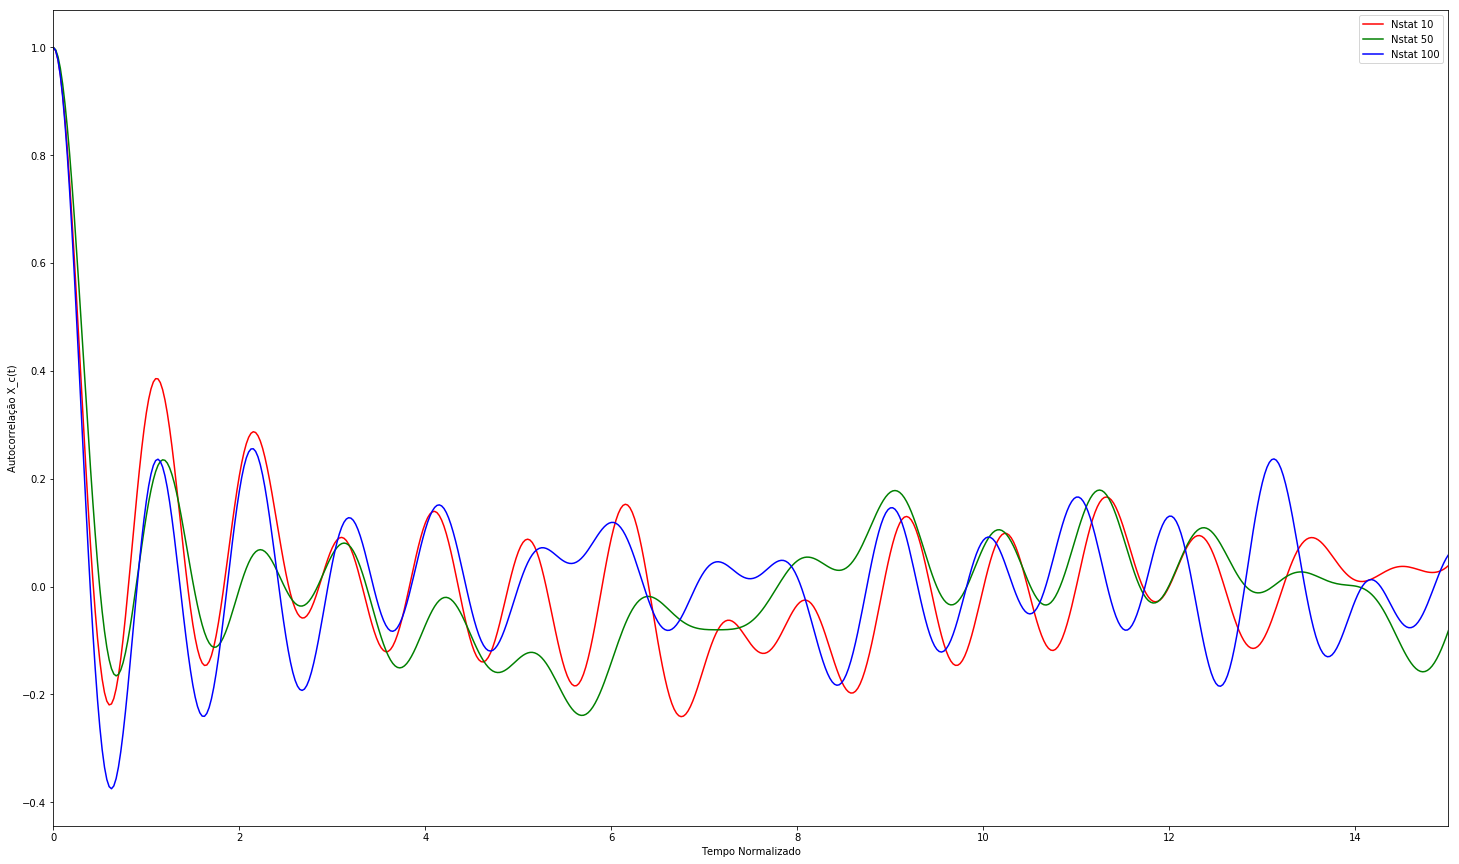

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(25, 15))
M = 8
const = np.sqrt(2/M)
ts = np.arange(0, 100, step=0.025)
Nstats = [10, 50, 100]
colors = ['r', 'g', 'b']


trials = {}
for i, Nstat in enumerate(Nstats):
    for N in range(Nstat):
        Xc_t = []
        theta_multi = np.random.uniform(-np.pi, np.pi)
        phi_multi = np.random.uniform(-np.pi, np.pi)
        psi_multi = np.random.uniform(-np.pi, np.pi, size=M)

        for t in ts:
            def return_an(n):
                return (2*np.pi*n-np.pi+theta_multi)/(4*M)

            Xc = np.sum(np.array([np.cos(psi_multi[m-1])*np.cos(2*np.pi*t*np.cos(return_an(m)+phi_multi)) 
                                  for m in range(1, M+1)]))
            Xc_t.append(const*Xc)

        Xc_t = np.array(Xc_t)
        trials[N] = Xc_t
    df = pd.DataFrame(trials)
    averages = df.mean(axis=1)
        
    c = np.correlate(averages.values, averages.values, mode='same')
    sns.lineplot(ts, c / c.max(), color=colors[i], label='Nstat ' + str(Nstat), ax=ax)
    
    ax.set_xlim(50, 65)
    
ax.legend()

ax.set_xticklabels(list(range(0, 15, 2)))
ax.set_xlabel('Tempo Normalizado')
ax.set_ylabel('Autocorrelação X_c(t)')

(15, 30)

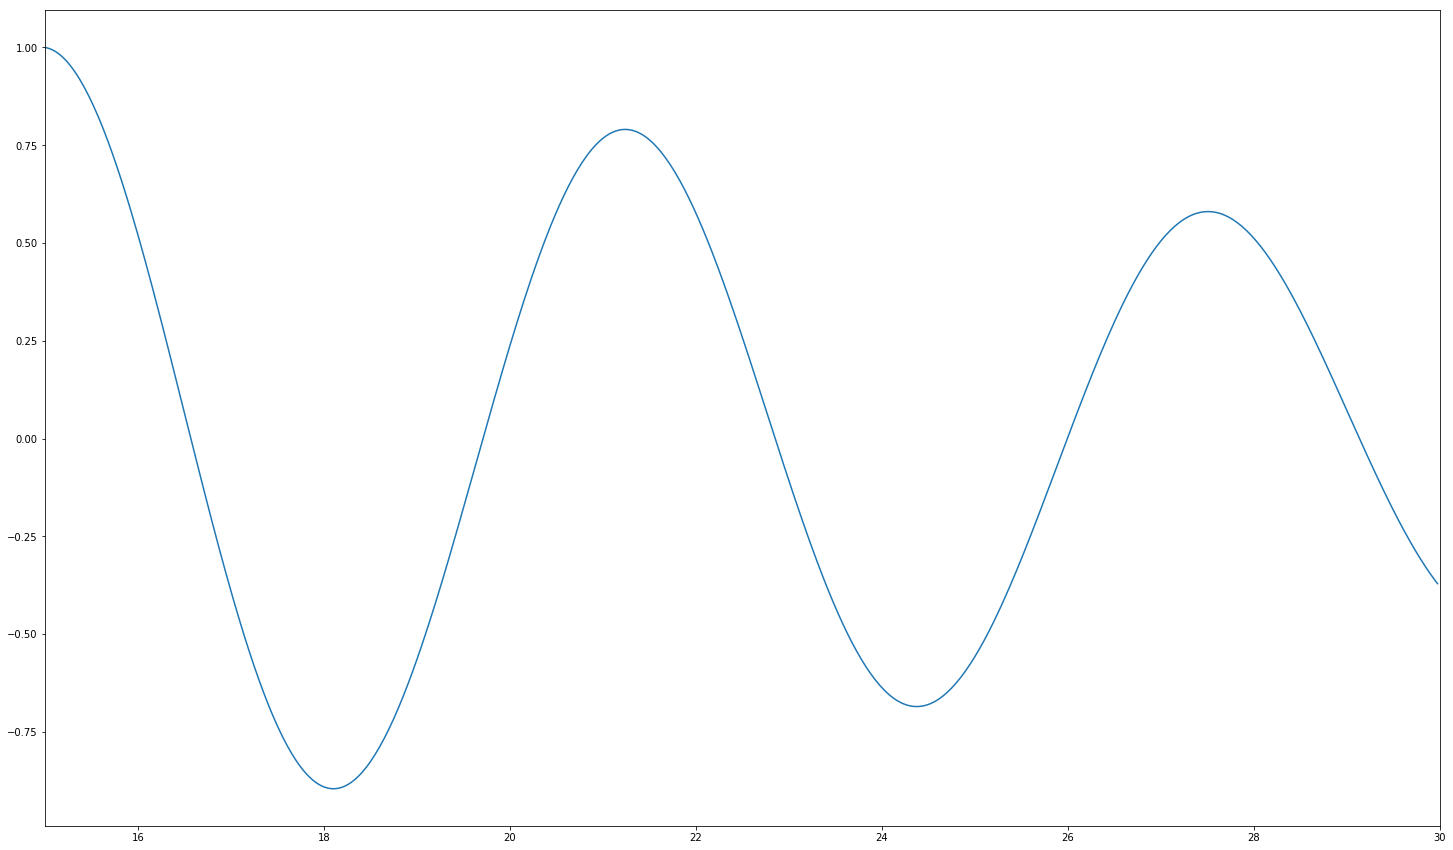

In [273]:
E_0 = np.sqrt(2)
C_n = 1/np.sqrt(4*M+2)
phi_multi = np.random.uniform(-np.pi, np.pi)
gc_t = []
ts = np.arange(0, 30, step=0.025)
M = 8

phi_n = np.random.uniform(-np.pi, np.pi)
a_n = np.random.uniform(-np.pi, np.pi)

for t in ts:
    def return_an(n):
        return p.random.uniform(-np.pi, np.pi)(2*np.pi*n/(4*M+2))

    gc = E_0*np.sum(np.array([C_n*np.cos(2*np.pi*t*np.cos(a_n)) 
                          for m in range(1, M+1)]))
    gc_t.append(gc)

fig, ax = plt.subplots(figsize=(25, 15))
c = np.correlate(np.array(gc_t), np.array(gc_t), mode='same')
sns.lineplot(ts, c / c.max(), ax=ax)
ax.set_xlim(15, 30)